In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('colorblind')
import os
import numpy as np
import glob
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
regression_dir = '/nfs/turbo/si-juliame/social-movements/sociocultural_regression_09-11-2023'
marginals_dir = '/home/juliame/social-movements/results/sociocultural_regression_09-27-2023'

In [3]:
reg_with_stance_files = glob.glob(os.path.join(regression_dir,'*_with_stance.tsv'))
reg_no_stance_files = glob.glob(os.path.join(regression_dir,'*_no_stance.tsv'))

marg_with_stance_files =  glob.glob(os.path.join(marginals_dir,'*_with_stance_margins.tsv'))
marg_no_stance_files =  glob.glob(os.path.join(marginals_dir,'*_no_stance_margins.tsv'))


macro_frames = ['diagnostic','prognostic','motivational']
frame_elements = ['identify','blame','solution','tactics','solidarity']

In [5]:
pd.read_csv(marg_no_stance_files[0],sep='\t')

,factor,AME,SE,z,p,lower,upper
1,interactionquote,0.107285,0.001296,82.772412,0.000000e+00,0.104744,0.109825
2,interactionreply,0.103971,0.000847,122.770422,0.000000e+00,0.102311,0.105631
3,issueimmigration,0.118078,0.000902,130.898117,0.000000e+00,0.116310,0.119846
4,issuelgbtq,-0.244155,0.001047,-233.131597,0.000000e+00,-0.246207,-0.242102
5,protest_activityhigh,0.001919,0.000889,2.158831,3.086329e-02,0.000177,0.003662
6,stakeholder_groupjournalist,-0.047315,0.007166,-6.603195,4.023895e-11,-0.061360,-0.033271
7,stakeholder_groupsmo,-0.210064,0.005747,-36.553220,1.585015e-292,-0.221327,-0.198800


In [6]:
def load_margin_files(frames,include_stance=True):
    dfs = []
    for frame in frames:
        if include_stance:
            filename = os.path.join(marginals_dir,frame+'_with_stance_margins.tsv')
        else:
            filename = os.path.join(marginals_dir,frame+'_no_stance_margins.tsv')
        df = pd.read_csv(filename,sep='\t')
        df['frame'] = frame
        dfs.append(df)
    return pd.concat(dfs)

In [7]:
def load_files(frames,include_stance=True):
    dfs = []
    for frame in frames:
        if include_stance:
            filename = os.path.join(regression_dir,frame+'_with_stance.tsv')
        else:
            filename = os.path.join(regression_dir,frame+'_no_stance.tsv')
        df = pd.read_csv(filename,sep='\t')
        df['frame'] = frame
        df = df[df['term']!='(Intercept)']
        dfs.append(df)
    return pd.concat(dfs)

In [8]:
df_with_stance = load_files(macro_frames,include_stance=True)
df_no_stance = load_files(macro_frames,include_stance=False)

marg_with_stance = load_margin_files(macro_frames,include_stance=True)
marg_no_stance = load_margin_files(macro_frames,include_stance=False)

In [9]:
marg_with_stance

,factor,AME,SE,z,p,lower,upper,frame
1,interactionquote,0.076506,0.001244,61.480953,0.000000e+00,0.074067,0.078945,diagnostic
2,interactionreply,0.116897,0.000820,142.581191,0.000000e+00,0.115290,0.118504,diagnostic
3,issueimmigration,0.122662,0.000813,150.872934,0.000000e+00,0.121069,0.124256,diagnostic
4,issuelgbtq,-0.164791,0.001207,-136.526069,0.000000e+00,-0.167157,-0.162426,diagnostic
5,protest_activityhigh,-0.037015,0.000822,-45.004755,0.000000e+00,-0.038627,-0.035403,diagnostic
6,stakeholder_groupjournalist,0.019330,0.006569,2.942843,3.252130e-03,0.006456,0.032205,diagnostic
7,stakeholder_groupsmo,-0.252105,0.006259,-40.281272,0.000000e+00,-0.264372,-0.239839,diagnostic
8,stanceconservative,0.098282,0.001110,88.546206,0.000000e+00,0.096107,0.100458,diagnostic
9,stanceprogressive,0.085297,0.000953,89.536773,0.000000e+00,0.083429,0.087164,diagnostic
1,interactionquote,-0.060318,0.001298,-46.477166,0.000000e+00,-0.062862,-0.057775,prognostic


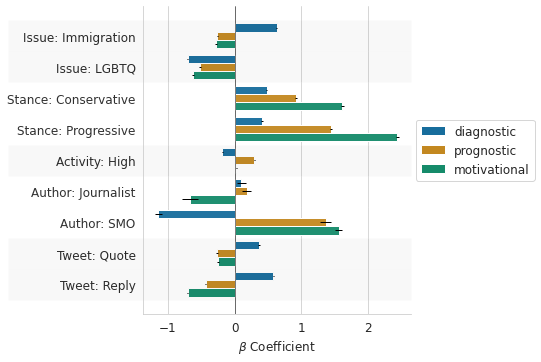

In [230]:
df = df_with_stance


term_order = df[df['frame']=='diagnostic']['term']
frame_order = df[df['term']=='issueimmigration']['frame']

df['term_order'] = pd.Categorical(df.term, categories = term_order, ordered = True)
df['frame_order'] = pd.Categorical(df.frame,categories = frame_order,ordered=True)
df1 = df.sort_values(by=['term_order','frame_order'])
g = sns.catplot(x='estimate',y='term',data=df1,kind='bar',aspect=1.25,hue='frame', legend=False) 
ax = g.axes[0,0]


err_pos = []
for patch in ax.patches:
    err_pos.append(patch.get_y() + patch.get_height()/2)
err_pos = sorted(err_pos)

df1['ci'] = df1['std.error']*1.96
plt.errorbar(data=df1,x = 'estimate',y=err_pos,xerr='ci',fmt='none',lw=1,color='black')

# #plt.title('Single Regression \n US data with ideologies \n All Frames')
plt.ylabel('')
plt.xlabel(r'$\beta$ Coefficient',size=12)
locs, labels = plt.yticks()
new_labels = ['Issue: Immigration','Issue: LGBTQ','Stance: Conservative','Stance: Progressive','Activity: High','Author: Journalist','Author: SMO','Tweet: Quote','Tweet: Reply']
plt.yticks(locs,new_labels,size=12)
plt.xticks(size=12)
plt.legend(loc='upper center',bbox_to_anchor=(1.24,.65),fontsize=12)


    
    
ax.axhspan(-.5,.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(.5,1.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(1.5,2.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(2.5,3.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(3.5,4.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(4.5,5.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(5.5,6.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(6.5,7.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(7.5,8.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axvline(0,color='black',lw=.5)
    
plt.savefig('/home/juliame/social-movements/results/sociocultural_regression_plot_with_stance.pdf', bbox_inches='tight')

# plt.show()

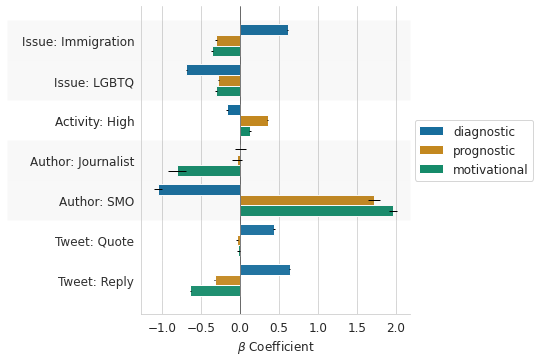

In [229]:
df = df_no_stance


term_order = df[df['frame']=='diagnostic']['term']
frame_order = df[df['term']=='issueimmigration']['frame']

df['term_order'] = pd.Categorical(df.term, categories = term_order, ordered = True)
df['frame_order'] = pd.Categorical(df.frame,categories = frame_order,ordered=True)
df1 = df.sort_values(by=['term_order','frame_order'])
g = sns.catplot(x='estimate',y='term',data=df1,kind='bar',aspect=1.25,hue='frame', legend=False) 
ax = g.axes[0,0]


err_pos = []
for patch in ax.patches:
    err_pos.append(patch.get_y() + patch.get_height()/2)
err_pos = sorted(err_pos)

df1['ci'] = df1['std.error']*1.96
plt.errorbar(data=df1,x = 'estimate',y=err_pos,xerr='ci',fmt='none',lw=1,color='black')

# #plt.title('Single Regression \n US data with ideologies \n All Frames')
plt.ylabel('')
plt.xlabel(r'$\beta$ Coefficient',size=12)
locs, labels = plt.yticks()
new_labels = ['Issue: Immigration','Issue: LGBTQ','Activity: High','Author: Journalist','Author: SMO','Tweet: Quote','Tweet: Reply']
plt.yticks(locs,new_labels,size=12)
plt.xticks(size=12)
plt.legend(loc='upper center',bbox_to_anchor=(1.24,.65),fontsize=12)


    
    
ax.axhspan(-.5,.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(.5,1.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(2.5,3.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(3.5,4.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(4.5,5.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(5.5,6.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)



ax.axvline(0,color='black',lw=.5)
plt.savefig('/home/juliame/social-movements/results/sociocultural_regression_plot_no_stance.pdf',bbox_inches='tight')

# plt.show()

In [43]:
marg_with_stance

,factor,AME,SE,z,p,lower,upper,frame
1,interactionquote,0.076506,0.001244,61.480953,0.000000e+00,0.074067,0.078945,diagnostic
2,interactionreply,0.116897,0.000820,142.581191,0.000000e+00,0.115290,0.118504,diagnostic
3,issueimmigration,0.122662,0.000813,150.872934,0.000000e+00,0.121069,0.124256,diagnostic
4,issuelgbtq,-0.164791,0.001207,-136.526069,0.000000e+00,-0.167157,-0.162426,diagnostic
5,protest_activityhigh,-0.037015,0.000822,-45.004755,0.000000e+00,-0.038627,-0.035403,diagnostic
6,stakeholder_groupjournalist,0.019330,0.006569,2.942843,3.252130e-03,0.006456,0.032205,diagnostic
7,stakeholder_groupsmo,-0.252105,0.006259,-40.281272,0.000000e+00,-0.264372,-0.239839,diagnostic
8,stanceconservative,0.098282,0.001110,88.546206,0.000000e+00,0.096107,0.100458,diagnostic
9,stanceprogressive,0.085297,0.000953,89.536773,0.000000e+00,0.083429,0.087164,diagnostic
1,interactionquote,-0.060318,0.001298,-46.477166,0.000000e+00,-0.062862,-0.057775,prognostic


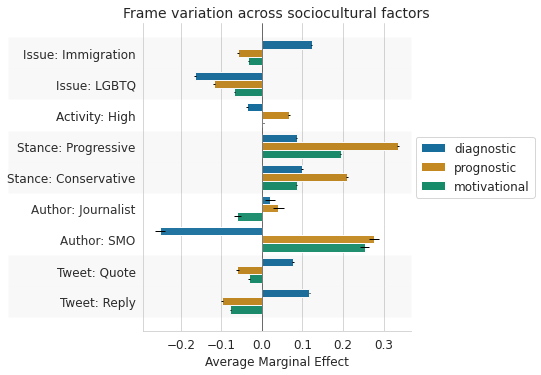

In [72]:
df = marg_with_stance
df['ci'] = df['SE']*1.96


frame_order = df[df['factor']=='issueimmigration']['frame']

term_order = ['issueimmigration','issuelgbtq','protest_activityhigh','stanceprogressive','stanceconservative',
              'stakeholder_groupjournalist','stakeholder_groupsmo',
              'interactionquote','interactionreply']
df['term_order'] = pd.Categorical(df.factor,categories = term_order,ordered=True)
df['frame_order'] = pd.Categorical(df.frame,categories = frame_order,ordered=True)

g = sns.catplot(x='AME',y='factor',data=df,kind='bar',aspect=1.25,hue='frame', order=term_order, legend=False) 

ax = g.axes[0,0]


err_pos = []
for patch in ax.patches:
    err_pos.append(patch.get_y() + patch.get_height()/2)
err_pos = sorted(err_pos)

plt.errorbar(data=df.sort_values(by=['term_order','frame_order']),x = 'AME',y=err_pos,xerr='ci',fmt='none',lw=1,color='black')

plt.title('Frame variation across sociocultural factors',fontsize=14)

plt.ylabel('')
plt.xlabel('Average Marginal Effect',size=12)
locs, labels = plt.yticks()
new_labels = ['Issue: Immigration','Issue: LGBTQ','Activity: High',
              'Stance: Progressive','Stance: Conservative',
              'Author: Journalist','Author: SMO','Tweet: Quote','Tweet: Reply']
plt.yticks(locs,new_labels,size=12)
plt.xticks(size=12)
plt.legend(loc='upper center',bbox_to_anchor=(1.24,.65),fontsize=12)

    
ax.axhspan(-.5,.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(.5,1.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(2.5,3.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(3.5,4.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(4.5,5.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(5.5,6.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(6.5,7.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(7.5,8.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axvline(0,color='black',lw=.5)
plt.savefig('/home/juliame/social-movements/results/sociocultural_margins_plot_with_stance.pdf',bbox_inches='tight')

# plt.show()

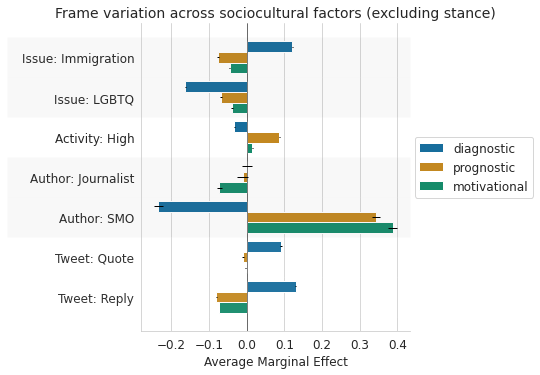

In [76]:
df = marg_no_stance
df['ci'] = df['SE']*1.96


frame_order = df[df['factor']=='issueimmigration']['frame']

term_order = ['issueimmigration','issuelgbtq','protest_activityhigh',
              'stakeholder_groupjournalist','stakeholder_groupsmo',
              'interactionquote','interactionreply']
df['term_order'] = pd.Categorical(df.factor,categories = term_order,ordered=True)
df['frame_order'] = pd.Categorical(df.frame,categories = frame_order,ordered=True)

g = sns.catplot(x='AME',y='factor',data=df,kind='bar',aspect=1.25,hue='frame', order=term_order, legend=False) 

ax = g.axes[0,0]


err_pos = []
for patch in ax.patches:
    err_pos.append(patch.get_y() + patch.get_height()/2)
err_pos = sorted(err_pos)

plt.errorbar(data=df.sort_values(by=['term_order','frame_order']),x = 'AME',y=err_pos,xerr='ci',fmt='none',lw=1,color='black')

plt.title('Frame variation across sociocultural factors (excluding stance)',fontsize=14)

plt.ylabel('')
plt.xlabel('Average Marginal Effect',size=12)
locs, labels = plt.yticks()
new_labels = ['Issue: Immigration','Issue: LGBTQ','Activity: High',
              'Author: Journalist','Author: SMO','Tweet: Quote','Tweet: Reply']
plt.yticks(locs,new_labels,size=12)
plt.xticks(size=12)
plt.legend(loc='upper center',bbox_to_anchor=(1.24,.65),fontsize=12)

    
ax.axhspan(-.5,.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(.5,1.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(2.5,3.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(3.5,4.5,facecolor='gray',clip_on=False,alpha=0.05,xmin=-.5)

ax.axhspan(4.5,5.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)
ax.axhspan(5.5,6.5,facecolor='white',clip_on=False,alpha=0.05,xmin=-.5)



ax.axvline(0,color='black',lw=.5)
plt.savefig('/home/juliame/social-movements/results/sociocultural_margins_plot_no_stance.pdf',bbox_inches='tight')

# plt.show()

In [40]:
term_order = ['issueimmigration','issuelgbtq','protest_activityhigh',
              'stakeholder_groupjournalist','stakeholder_groupsmo',
             'interactionquote','interactionreply']

In [65]:
df.sort_values(by=['term_order','frame_order'])

,factor,AME,SE,z,p,lower,upper,frame,frame_order,ci,term_order
3,issueimmigration,0.122662,0.000813,150.872934,0.000000e+00,0.121069,0.124256,diagnostic,diagnostic,0.001594,issueimmigration
3,issueimmigration,-0.059235,0.000872,-67.957801,0.000000e+00,-0.060943,-0.057526,prognostic,prognostic,0.001708,issueimmigration
3,issueimmigration,-0.033551,0.000651,-51.514569,0.000000e+00,-0.034828,-0.032275,motivational,motivational,0.001277,issueimmigration
4,issuelgbtq,-0.164791,0.001207,-136.526069,0.000000e+00,-0.167157,-0.162426,diagnostic,diagnostic,0.002366,issuelgbtq
4,issuelgbtq,-0.117642,0.001166,-100.923160,0.000000e+00,-0.119926,-0.115357,prognostic,prognostic,0.002285,issuelgbtq
4,issuelgbtq,-0.067719,0.000721,-93.951855,0.000000e+00,-0.069132,-0.066306,motivational,motivational,0.001413,issuelgbtq
5,protest_activityhigh,-0.037015,0.000822,-45.004755,0.000000e+00,-0.038627,-0.035403,diagnostic,diagnostic,0.001612,protest_activityhigh
5,protest_activityhigh,0.066629,0.000893,74.616377,0.000000e+00,0.064879,0.068379,prognostic,prognostic,0.001750,protest_activityhigh
5,protest_activityhigh,0.002706,0.000640,4.224603,2.393619e-05,0.001450,0.003961,motivational,motivational,0.001255,protest_activityhigh
9,stanceprogressive,0.085297,0.000953,89.536773,0.000000e+00,0.083429,0.087164,diagnostic,diagnostic,0.001867,stanceprogressive


In [4]:
marg_with_stance.g

NameError: name 'marg_with_stance' is not defined